# Financial sentimental analysis and using it to predictit stock price

### data gathering 

# i have scarped the data from news website 

# i have scrraped the data 

In [87]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [88]:
df=pd.read_csv("reilance_final_news.csv")

In [89]:
df = pd.read_csv("reilance_final_news.csv")

# Data cleaning
columns_to_keep = ['date', 'headline', 'news']
df = df[columns_to_keep].dropna()


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, 0 to 4609
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1992 non-null   object
 1   headline  1992 non-null   object
 2   news      1992 non-null   object
dtypes: object(3)
memory usage: 62.2+ KB


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import optuna
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import yfinance as yf

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [92]:
# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply text preprocessing
df['clean_headline'] = df['headline'].apply(preprocess_text)
df['clean_news'] = df['news'].apply(preprocess_text)

print(df[['headline', 'clean_headline']].head())

                                            headline  \
0  Q2 Results Live Updates: RIL, HCLTech Among Ke...   
1  Jio Prepaid Recharge Plans: Check Latest Recha...   
2  RIL Q2 preview: Refining weighs on profits, Ji...   
3  Mukesh Ambani's Reliance Industries eyeing a s...   
5  Reliance Industries Q2 Preview: Weak O2C Segme...   

                                      clean_headline  
0  q results live updates ril hcltech among key e...  
1  jio prepaid recharge plans check latest rechar...  
2  ril q preview refining weighs profits jio reta...  
3  mukesh ambanis reliance industries eyeing slic...  
5  reliance industries q preview weak oc segment ...  


In [93]:
df.sample(5)

,date,headline,news,clean_headline,clean_news
598,28 Oct 2023,Jio MAMI 2023 | Guras: Darjeeling director Sau...,The award-winning filmmaker's sophomore featur...,jio mami guras darjeeling director saurav rai ...,awardwinning filmmakers sophomore feature sout...
2849,17 Aug 2020,Biyani-RIL deal hits pause button,Biyani-RIL deal hits pause buttonWith the IPL ...,biyaniril deal hits pause button,biyaniril deal hits pause buttonwith ipl movin...
2579,28 Jan 2021,Reliance Jio looks beyond mobile operations to...,"With subscriber additions slowing, the price-c...",reliance jio looks beyond mobile operations mo...,subscriber additions slowing pricecompetitive ...
3214,05 Mar 2020,Reliance Retail acquires Shri Kannan Departmen...,Our Bureau Mukesh Ambani-owned Reliance Retail...,reliance retail acquires shri kannan departmen...,bureau mukesh ambaniowned reliance retail vent...
534,29 Nov 2023,Reliance Industries Share Price Live blog for ...,"Reliance Industries stock price went up today,...",reliance industries share price live blog nov,reliance industries stock price went today nov...


# preprocesing and cleaing data 

In [95]:
df.isna().sum()

date              0
headline          0
news              0
clean_headline    0
clean_news        0
dtype: int64

In [96]:
clean_df=df.dropna(subset='date')

In [97]:
clean_df['date'].isna().sum()

0

In [98]:
df

,date,headline,news,clean_headline,clean_news
0,"14 Oct 2024, 12:14PM","Q2 Results Live Updates: RIL, HCLTech Among Ke...",Reliance Industries is likely to report a net ...,q results live updates ril hcltech among key e...,reliance industries likely report net profit r...
1,"14 Oct 2024, 11:46AM",Jio Prepaid Recharge Plans: Check Latest Recha...,Jio has also rolled out mid-year prepaid recha...,jio prepaid recharge plans check latest rechar...,jio also rolled midyear prepaid recharge plans...
2,"14 Oct 2024, 09:32AM","RIL Q2 preview: Refining weighs on profits, Ji...","The telecom segment, led by Reliance Jio, is p...",ril q preview refining weighs profits jio reta...,telecom segment led reliance jio poised growth...
3,"14 Oct 2024, 08:46AM",Mukesh Ambani's Reliance Industries eyeing a s...,Mukesh Ambani-led Reliance Industries aims to ...,mukesh ambanis reliance industries eyeing slic...,mukesh ambaniled reliance industries aims stre...
5,11 Oct 2024,Reliance Industries Q2 Preview: Weak O2C Segme...,The O2C and upstream oil and gas segments cont...,reliance industries q preview weak oc segment ...,oc upstream oil gas segments contributed relia...
...,...,...,...,...,...
4600,24 Sep 2017,Weekly Trading Guide,RIL hovers above key near-term support RIL rev...,weekly trading guide,ril hovers key nearterm support ril reversed s...
4601,22 Sep 2017,Reliance to deliver 6 mn JioPhones in 15 days ...,JioPhone will come with pre-loaded Jio apps fo...,reliance deliver mn jiophones days starting su...,jiophone come preloaded jio apps messaging ent...
4603,21 Sep 2017,JioPhonedeliveries likely to start over weekend,Jio had earlier said that it aims to deliver 1...,jiophonedeliveries likely start weekend,jio earlier said aims deliver million phones n...
4606,17 Sep 2017,RIL reverses lower from a key resistance,RIL surged over 3 per cent last week. It teste...,ril reverses lower key resistance,ril surged per cent last week tested resistanc...


In [99]:
from datetime import datetime
def convert_datetime(date_str):
    try:
        date_obj=datetime.strptime(date_str, '%d %b %Y, %I:%M%p')
    except ValueError:
        date_obj = datetime.strptime(date_str, '%d %b %Y')
    return date_obj.strftime('%m/%d/%y')
    
        
        


In [100]:
clean_df['date'] = clean_df['date'].apply(convert_datetime)

In [101]:
clean_df

,date,headline,news,clean_headline,clean_news
0,10/14/24,"Q2 Results Live Updates: RIL, HCLTech Among Ke...",Reliance Industries is likely to report a net ...,q results live updates ril hcltech among key e...,reliance industries likely report net profit r...
1,10/14/24,Jio Prepaid Recharge Plans: Check Latest Recha...,Jio has also rolled out mid-year prepaid recha...,jio prepaid recharge plans check latest rechar...,jio also rolled midyear prepaid recharge plans...
2,10/14/24,"RIL Q2 preview: Refining weighs on profits, Ji...","The telecom segment, led by Reliance Jio, is p...",ril q preview refining weighs profits jio reta...,telecom segment led reliance jio poised growth...
3,10/14/24,Mukesh Ambani's Reliance Industries eyeing a s...,Mukesh Ambani-led Reliance Industries aims to ...,mukesh ambanis reliance industries eyeing slic...,mukesh ambaniled reliance industries aims stre...
5,10/11/24,Reliance Industries Q2 Preview: Weak O2C Segme...,The O2C and upstream oil and gas segments cont...,reliance industries q preview weak oc segment ...,oc upstream oil gas segments contributed relia...
...,...,...,...,...,...
4600,09/24/17,Weekly Trading Guide,RIL hovers above key near-term support RIL rev...,weekly trading guide,ril hovers key nearterm support ril reversed s...
4601,09/22/17,Reliance to deliver 6 mn JioPhones in 15 days ...,JioPhone will come with pre-loaded Jio apps fo...,reliance deliver mn jiophones days starting su...,jiophone come preloaded jio apps messaging ent...
4603,09/21/17,JioPhonedeliveries likely to start over weekend,Jio had earlier said that it aims to deliver 1...,jiophonedeliveries likely start weekend,jio earlier said aims deliver million phones n...
4606,09/17/17,RIL reverses lower from a key resistance,RIL surged over 3 per cent last week. It teste...,ril reverses lower key resistance,ril surged per cent last week tested resistanc...


In [103]:
clean_df['final_news'] = clean_df['headline'].combine_first(clean_df['news'])

In [104]:
clean_df

,date,headline,news,clean_headline,clean_news,final_news
0,10/14/24,"Q2 Results Live Updates: RIL, HCLTech Among Ke...",Reliance Industries is likely to report a net ...,q results live updates ril hcltech among key e...,reliance industries likely report net profit r...,"Q2 Results Live Updates: RIL, HCLTech Among Ke..."
1,10/14/24,Jio Prepaid Recharge Plans: Check Latest Recha...,Jio has also rolled out mid-year prepaid recha...,jio prepaid recharge plans check latest rechar...,jio also rolled midyear prepaid recharge plans...,Jio Prepaid Recharge Plans: Check Latest Recha...
2,10/14/24,"RIL Q2 preview: Refining weighs on profits, Ji...","The telecom segment, led by Reliance Jio, is p...",ril q preview refining weighs profits jio reta...,telecom segment led reliance jio poised growth...,"RIL Q2 preview: Refining weighs on profits, Ji..."
3,10/14/24,Mukesh Ambani's Reliance Industries eyeing a s...,Mukesh Ambani-led Reliance Industries aims to ...,mukesh ambanis reliance industries eyeing slic...,mukesh ambaniled reliance industries aims stre...,Mukesh Ambani's Reliance Industries eyeing a s...
5,10/11/24,Reliance Industries Q2 Preview: Weak O2C Segme...,The O2C and upstream oil and gas segments cont...,reliance industries q preview weak oc segment ...,oc upstream oil gas segments contributed relia...,Reliance Industries Q2 Preview: Weak O2C Segme...
...,...,...,...,...,...,...
4600,09/24/17,Weekly Trading Guide,RIL hovers above key near-term support RIL rev...,weekly trading guide,ril hovers key nearterm support ril reversed s...,Weekly Trading Guide
4601,09/22/17,Reliance to deliver 6 mn JioPhones in 15 days ...,JioPhone will come with pre-loaded Jio apps fo...,reliance deliver mn jiophones days starting su...,jiophone come preloaded jio apps messaging ent...,Reliance to deliver 6 mn JioPhones in 15 days ...
4603,09/21/17,JioPhonedeliveries likely to start over weekend,Jio had earlier said that it aims to deliver 1...,jiophonedeliveries likely start weekend,jio earlier said aims deliver million phones n...,JioPhonedeliveries likely to start over weekend
4606,09/17/17,RIL reverses lower from a key resistance,RIL surged over 3 per cent last week. It teste...,ril reverses lower key resistance,ril surged per cent last week tested resistanc...,RIL reverses lower from a key resistance


In [105]:
clean_df.drop(['headline','news'],axis=1,inplace=True)

In [106]:
clean_df.isna().sum()

date              0
clean_headline    0
clean_news        0
final_news        0
dtype: int64

In [107]:
clean_df.dropna(inplace=True)

In [108]:
clean_df

,date,clean_headline,clean_news,final_news
0,10/14/24,q results live updates ril hcltech among key e...,reliance industries likely report net profit r...,"Q2 Results Live Updates: RIL, HCLTech Among Ke..."
1,10/14/24,jio prepaid recharge plans check latest rechar...,jio also rolled midyear prepaid recharge plans...,Jio Prepaid Recharge Plans: Check Latest Recha...
2,10/14/24,ril q preview refining weighs profits jio reta...,telecom segment led reliance jio poised growth...,"RIL Q2 preview: Refining weighs on profits, Ji..."
3,10/14/24,mukesh ambanis reliance industries eyeing slic...,mukesh ambaniled reliance industries aims stre...,Mukesh Ambani's Reliance Industries eyeing a s...
5,10/11/24,reliance industries q preview weak oc segment ...,oc upstream oil gas segments contributed relia...,Reliance Industries Q2 Preview: Weak O2C Segme...
...,...,...,...,...
4600,09/24/17,weekly trading guide,ril hovers key nearterm support ril reversed s...,Weekly Trading Guide
4601,09/22/17,reliance deliver mn jiophones days starting su...,jiophone come preloaded jio apps messaging ent...,Reliance to deliver 6 mn JioPhones in 15 days ...
4603,09/21/17,jiophonedeliveries likely start weekend,jio earlier said aims deliver million phones n...,JioPhonedeliveries likely to start over weekend
4606,09/17/17,ril reverses lower key resistance,ril surged per cent last week tested resistanc...,RIL reverses lower from a key resistance


In [109]:
clean_df['date'] = pd.to_datetime(clean_df['date'], format='%m/%d/%y')


In [110]:
clean_df.sort_values(by='date', inplace=True)

In [111]:
clean_df = clean_df.groupby('date')['final_news'].apply(lambda x: ' '.join(x)).reset_index()

In [112]:
clean_df.sample()

,date,final_news
759,2021-06-01,"Better petchem prospects, low-cost Jio smartph..."


In [113]:
clean_df

,date,final_news
0,2017-09-14,IUC subsidising incumbent operators: Reliance Jio
1,2017-09-17,RIL reverses lower from a key resistance
2,2017-09-21,JioPhonedeliveries likely to start over weekend
3,2017-09-22,Reliance to deliver 6 mn JioPhones in 15 days ...
4,2017-09-24,Weekly Trading Guide
...,...,...
1426,2024-10-08,Oil And Gas Q2 Earnings Preview - To Be A Mixe...
1427,2024-10-09,Q2 result preview: O2C business may drag RIL t...
1428,2024-10-10,"Forbes 2024: Ambani leads, Adani gains big, In..."
1429,2024-10-11,Reliance Industries Q2 Preview: Weak O2C Segme...


In [114]:
clean_df.isna().sum()

date          0
final_news    0
dtype: int64

# lowercas

In [117]:
clean_df['final_news'] = clean_df['final_news'].str.lower()

In [118]:
clean_df['date']

0      2017-09-14
1      2017-09-17
2      2017-09-21
3      2017-09-22
4      2017-09-24
          ...    
1426   2024-10-08
1427   2024-10-09
1428   2024-10-10
1429   2024-10-11
1430   2024-10-14
Name: date, Length: 1431, dtype: datetime64[ns]

In [119]:
clean_df.info

<bound method DataFrame.info of            date                                         final_news
0    2017-09-14  iuc subsidising incumbent operators: reliance jio
1    2017-09-17           ril reverses lower from a key resistance
2    2017-09-21    jiophonedeliveries likely to start over weekend
3    2017-09-22  reliance to deliver 6 mn jiophones in 15 days ...
4    2017-09-24                               weekly trading guide
...         ...                                                ...
1426 2024-10-08  oil and gas q2 earnings preview - to be a mixe...
1427 2024-10-09  q2 result preview: o2c business may drag ril t...
1428 2024-10-10  forbes 2024: ambani leads, adani gains big, in...
1429 2024-10-11  reliance industries q2 preview: weak o2c segme...
1430 2024-10-14  mukesh ambani's reliance industries eyeing a s...

[1431 rows x 2 columns]>

# remove html tag 

In [523]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [524]:
clean_df['final_news'] = clean_df['final_news'].apply(remove_html_tags)

In [525]:
clean_df['final_news'].sample(10)

2                ril reverses lower from a key resistance
1263    reliance industries ltd. - 500325 - compliance...
190     capex done, mukesh ambani's reliance industrie...
836     reliance industries ltd. - 500325 - announceme...
1730    reliance industries ltd. - 500325 - compliance...
782     future group lost rs 7,000 cr revenue in first...
1010    reliance industries ltd - 500325 - compliances...
561     reliance, bp buy out niko from the kg-d6 psc f...
979     reliance industries ltd - 500325 - compliances...
1251    ril, ongc: time to sell oil stocks amid export...
Name: final_news, dtype: object

# link removal 

In [527]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [528]:
clean_df['final_news'] = clean_df['final_news'].apply(remove_url)

# remove pancuation 

In [530]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [531]:
exclude = string.punctuation

In [532]:
def remove_punc1(text):
    return text.translate(str.maketrans('', '', exclude))

In [533]:
clean_df['final_news'] = clean_df['final_news'].apply(remove_punc1)

In [534]:
clean_df['final_news'].sample(10)

1688    mukesh ambani ranked first in brand guardiansh...
587     removal of antidumping duty on pta may hit ril...
633     india ends antidumpping probe against meg impo...
645     reliance industries ltd  500325  board meeting...
783     reliance industries ltd  500325  compliancesre...
948     16000 profit possible with this fo strategy on...
1509    150 bn ecommerce biz retail telecom media mix ...
545     reliance industries ltd  500325  announcement ...
774     reliance industries ltd  500325  announcement ...
717     jiomart crosses one lakh downloads top10 in th...
Name: final_news, dtype: object

# stop word remove

In [536]:
from nltk.corpus import stopwords

In [537]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [538]:
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [539]:
clean_df['final_news'] = clean_df['final_news'].apply(remove_stopwords)

In [540]:
clean_df['final_news'].sample(10)

1344      demerger   financial services biz mean  ril ...
449     reliance industries ltd 500325 compliancesreg ...
804     reliance industries ltd 500325 compliancesreg ...
104      investors summit jio  invest rs 100 bn  3 yrs...
1541    reliance industries ltd 500325 updates  disclo...
1857    bif opposes jios demand  revising consultation...
440     ril  built foundation  next decade  fy19 says ...
748     mukesh ambaniled reliance jio  invest  rs 1000...
1428    bpreliances giant deepwater project offshore n...
1108    reliance new energy solar  buy faradion relian...
Name: final_news, dtype: object

In [541]:
clean_df

,date,final_news
0,2017-09-14,iuc subsidising incumbent operators reliance jio
1,2017-09-15,analyst investor meet outcome
2,2017-09-17,ril reverses lower key resistance
3,2017-09-20,press release media release
4,2017-09-21,jiophonedeliveries likely start weekend disc...
...,...,...
1857,2024-10-08,bif opposes jios demand revising consultation...
1858,2024-10-09,q2 result preview o2c business may drag ril a...
1859,2024-10-10,forbes 2024 ambani leads adani gains big india...
1860,2024-10-11,reliance industries q2 preview weak o2c segmen...


# steming 

In [543]:
from nltk.stem.porter import PorterStemmer

In [544]:
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [545]:
clean_df['final_news'] = clean_df['final_news'].apply(stem_words)

In [546]:
clean_df

,date,final_news
0,2017-09-14,iuc subsidis incumb oper relianc jio
1,2017-09-15,analyst investor meet outcom
2,2017-09-17,ril revers lower key resist
3,2017-09-20,press releas media releas
4,2017-09-21,jiophonedeliveri like start weekend disclosur ...
...,...,...
1857,2024-10-08,bif oppos jio demand revis consult paper satco...
1858,2024-10-09,q2 result preview o2c busi may drag ril anoth ...
1859,2024-10-10,forb 2024 ambani lead adani gain big india ric...
1860,2024-10-11,relianc industri q2 preview weak o2c segment d...


# getting stock data 

In [120]:
import yfinance as yf

# Define the stock symbol and date range
stock_symbol = 'RELIANCE.NS'
start_date = '2017-09-14'
end_date = '2024-10-14'

# Fetch the stock data
reliance_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Display the first few rows of the fetched data
print(reliance_data.head())


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-09-14  782.485962  787.697632  769.868164  771.559631  748.487000   
2017-09-15  769.868164  779.788635  763.239258  769.685303  746.668640   
2017-09-18  777.182800  778.142883  770.873901  773.114014  749.994812   
2017-09-19  775.994202  776.039917  765.296509  766.759399  743.830200   
2017-09-20  782.760254  797.755310  772.702576  774.576965  751.414062   

              Volume  
Date                  
2017-09-14   5933820  
2017-09-15  14297697  
2017-09-18   2530997  
2017-09-19   3859348  
2017-09-20  12471351  


In [121]:
reliance_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-14,782.485962,787.697632,769.868164,771.559631,748.487000,5933820
2017-09-15,769.868164,779.788635,763.239258,769.685303,746.668640,14297697
2017-09-18,777.182800,778.142883,770.873901,773.114014,749.994812,2530997
2017-09-19,775.994202,776.039917,765.296509,766.759399,743.830200,3859348
2017-09-20,782.760254,797.755310,772.702576,774.576965,751.414062,12471351
...,...,...,...,...,...,...
2024-10-07,2787.000000,2793.000000,2722.750000,2741.449951,2741.449951,11090670
2024-10-08,2745.949951,2802.000000,2730.199951,2794.699951,2794.699951,8510404
2024-10-09,2795.050049,2801.949951,2745.000000,2749.199951,2749.199951,7155305


In [122]:
reliance_data.reset_index(inplace=True)

In [123]:
reliance_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-14,782.485962,787.697632,769.868164,771.559631,748.487000,5933820
1,2017-09-15,769.868164,779.788635,763.239258,769.685303,746.668640,14297697
2,2017-09-18,777.182800,778.142883,770.873901,773.114014,749.994812,2530997
3,2017-09-19,775.994202,776.039917,765.296509,766.759399,743.830200,3859348
4,2017-09-20,782.760254,797.755310,772.702576,774.576965,751.414062,12471351
...,...,...,...,...,...,...,...
1742,2024-10-07,2787.000000,2793.000000,2722.750000,2741.449951,2741.449951,11090670
1743,2024-10-08,2745.949951,2802.000000,2730.199951,2794.699951,2794.699951,8510404
1744,2024-10-09,2795.050049,2801.949951,2745.000000,2749.199951,2749.199951,7155305
1745,2024-10-10,2760.050049,2772.000000,2738.850098,2742.100098,2742.100098,11179323


In [124]:
date_range = pd.date_range(start='2017-09-14', end='2024-10-14', freq='D')

In [125]:
reliance_data = reliance_data.set_index('Date')

In [126]:
reliance_resampled = reliance_data.reindex(date_range, method='ffill')

In [127]:
reliance_resampled.reset_index(inplace=True)
reliance_resampled.rename(columns={'index': 'date'}, inplace=True)

In [128]:
final_data = pd.merge(reliance_resampled, clean_df, on='date', how='left')

In [129]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2588 entries, 0 to 2587
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2588 non-null   datetime64[ns]
 1   Open        2588 non-null   float64       
 2   High        2588 non-null   float64       
 3   Low         2588 non-null   float64       
 4   Close       2588 non-null   float64       
 5   Adj Close   2588 non-null   float64       
 6   Volume      2588 non-null   int64         
 7   final_news  1431 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 161.9+ KB


In [130]:
final_data['final_news'].fillna('neutral', inplace=True)

In [131]:
final_data=final_data[['date', 'Adj Close', 'final_news']]

In [132]:
final_data

,date,Adj Close,final_news
0,2017-09-14,748.487000,iuc subsidising incumbent operators: reliance jio
1,2017-09-15,746.668640,neutral
2,2017-09-16,746.668640,neutral
3,2017-09-17,746.668640,ril reverses lower from a key resistance
4,2017-09-18,749.994812,neutral
...,...,...,...
2583,2024-10-10,2742.100098,"forbes 2024: ambani leads, adani gains big, in..."
2584,2024-10-11,2744.199951,reliance industries q2 preview: weak o2c segme...
2585,2024-10-12,2744.199951,neutral
2586,2024-10-13,2744.199951,neutral


In [133]:
final_data.isna().sum()

date          0
Adj Close     0
final_news    0
dtype: int64

In [134]:
final_data

,date,Adj Close,final_news
0,2017-09-14,748.487000,iuc subsidising incumbent operators: reliance jio
1,2017-09-15,746.668640,neutral
2,2017-09-16,746.668640,neutral
3,2017-09-17,746.668640,ril reverses lower from a key resistance
4,2017-09-18,749.994812,neutral
...,...,...,...
2583,2024-10-10,2742.100098,"forbes 2024: ambani leads, adani gains big, in..."
2584,2024-10-11,2744.199951,reliance industries q2 preview: weak o2c segme...
2585,2024-10-12,2744.199951,neutral
2586,2024-10-13,2744.199951,neutral


In [135]:
reliance_data.tail(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-13,2952.800049,2966.300049,2939.000000,2945.250000,2945.250000,4355664
2024-09-16,2955.100098,2961.800049,2929.500000,2942.699951,2942.699951,2740887
2024-09-17,2948.000000,2954.949951,2933.250000,2944.600098,2944.600098,2967664
2024-09-18,2940.000000,2964.000000,2921.100098,2926.899902,2926.899902,4287357
2024-09-19,2932.500000,2953.000000,2911.100098,2939.350098,2939.350098,8477951
2024-09-20,2948.000000,2990.000000,2942.750000,2971.850098,2971.850098,15448660
2024-09-23,2982.000000,3003.000000,2977.899902,2986.750000,2986.750000,4416157
2024-09-24,2977.000000,3001.000000,2975.750000,2978.750000,2978.750000,8568722
2024-09-25,2967.800049,2993.000000,2960.399902,2987.899902,2987.899902,3534501


#!pip install transformers torch

In [137]:
final_data.isna().sum()

date          0
Adj Close     0
final_news    0
dtype: int64

In [138]:
#final_data['final_news'] = final_data['final_news'].replace(1, 0.5)

In [139]:
final_data

,date,Adj Close,final_news
0,2017-09-14,748.487000,iuc subsidising incumbent operators: reliance jio
1,2017-09-15,746.668640,neutral
2,2017-09-16,746.668640,neutral
3,2017-09-17,746.668640,ril reverses lower from a key resistance
4,2017-09-18,749.994812,neutral
...,...,...,...
2583,2024-10-10,2742.100098,"forbes 2024: ambani leads, adani gains big, in..."
2584,2024-10-11,2744.199951,reliance industries q2 preview: weak o2c segme...
2585,2024-10-12,2744.199951,neutral
2586,2024-10-13,2744.199951,neutral


# building Finbert model 

In [141]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Sentimental Analysis

In [143]:
# Perform sentiment analysis using FinBERT
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

def get_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512, padding=True)
    outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_score = probabilities[:, 2].item() - probabilities[:, 0].item()
    return sentiment_score

final_data['sentiment'] = final_data['final_news'].apply(get_sentiment)

# Sort by date
final_data = final_data.sort_values('date')



(array([ 236.,   83.,   68.,   55.,   78.,  176.,   72.,   86.,  171.,
        1563.]),
 array([-0.93011373, -0.74435318, -0.55859264, -0.3728321 , -0.18707155,
        -0.00131101,  0.18444953,  0.37021008,  0.55597062,  0.74173116,
         0.9274917 ]),
 <BarContainer object of 10 artists>)

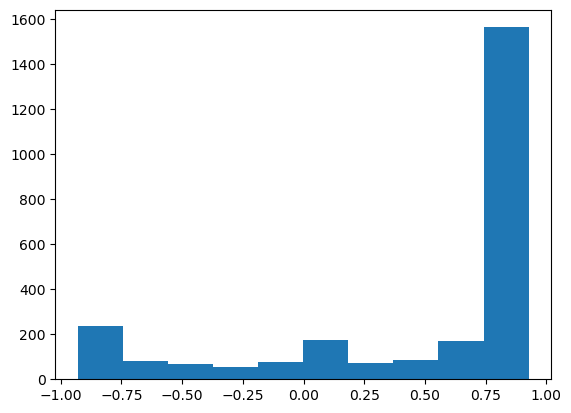

In [144]:
plt.hist(final_data['sentiment'])

In [145]:
final_data['sentiment'].value_counts()

sentiment
 0.757650    1157
 0.885664       2
 0.839608       1
 0.753900       1
 0.498337       1
             ... 
 0.164417       1
-0.649430       1
 0.837905       1
 0.587553       1
-0.316534       1
Name: count, Length: 1431, dtype: int64

In [146]:
final_data=final_data[['date','Adj Close','sentiment']]

In [147]:
final_data

,date,Adj Close,sentiment
0,2017-09-14,748.487000,0.728521
1,2017-09-15,746.668640,0.757650
2,2017-09-16,746.668640,0.757650
3,2017-09-17,746.668640,-0.045966
4,2017-09-18,749.994812,0.757650
...,...,...,...
2583,2024-10-10,2742.100098,-0.741621
2584,2024-10-11,2744.199951,0.004366
2585,2024-10-12,2744.199951,0.757650
2586,2024-10-13,2744.199951,0.757650


In [634]:
final_data.set_index('date',inplace=True)

In [635]:
final_data

,Adj Close,sentiment
date,,
2017-09-14,748.486877,0.0
2017-09-15,746.668640,0.0
2017-09-16,746.668640,1.0
2017-09-17,746.668640,0.0
2017-09-18,749.994751,1.0
...,...,...
2024-10-10,2742.100098,1.0
2024-10-11,2744.199951,0.0
2024-10-12,2744.199951,1.0


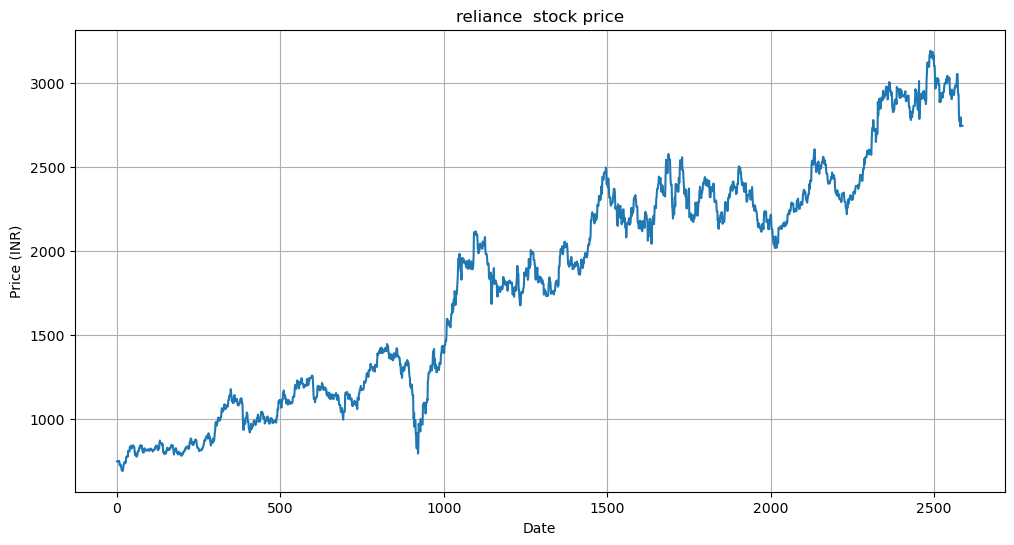

In [148]:
plt.figure(figsize=(12,6))
plt.plot(final_data['Adj Close'])

plt.title('reliance  stock price')
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

# spliting data 

In [150]:
train =pd.DataFrame(final_data[0:int(len(final_data['sentiment'])*0.70)])
test=pd.DataFrame(final_data[int(len(final_data['sentiment'])*0.70):int(len(final_data['sentiment']))])

In [151]:
train.shape


(1811, 3)

In [152]:
train

,date,Adj Close,sentiment
0,2017-09-14,748.487000,0.728521
1,2017-09-15,746.668640,0.757650
2,2017-09-16,746.668640,0.757650
3,2017-09-17,746.668640,-0.045966
4,2017-09-18,749.994812,0.757650
...,...,...,...
1806,2022-08-25,2412.641357,0.757650
1807,2022-08-26,2399.762451,0.852056
1808,2022-08-27,2399.762451,0.922221
1809,2022-08-28,2399.762451,0.757650


In [153]:
# Scale the 'Close' price and 'Sentiment' values
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = train[['Adj Close', 'sentiment']].values
test_data = test[['Adj Close', 'sentiment']].values

In [154]:
data_training_array = scaler.fit_transform(train_data)
data_testing_array = scaler.transform(test_data)

In [155]:

X_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    X_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])  
X_train, y_train = np.array(X_train), np.array(y_train)

In [156]:
print(X_train.shape) 

(1711, 100, 2)


In [186]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32),
    Dense(1)
])

In [187]:
import tensorflow as tf
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [188]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 100, 128)            │          67,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,593 (463.25 KB)

 Trainable params: 118,593 (463.25 KB)

 Non-trainable params: 0 (0.00 B)

In [189]:
history = model.fit(X_train, y_train, epochs=30, verbose=1)

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 0.0593 - mean_absolute_error: 0.1580
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 0.0040 - mean_absolute_error: 0.0460
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0028 - mean_absolute_error: 0.0395
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0027 - mean_absolute_error: 0.0374
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.0024 - mean_absolute_error: 0.0360
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0022 - mean_absolute_error: 0.0351
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0020 - mean_absolute_error: 0.0334
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0019 - mean_absolute_error: 0.0314
Epoch 9/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0019 - mean_absolute_error: 0.0315
Epoch 10/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0023 - mean_absolute_error: 0.0345
Epoch 11/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 

In [190]:
past_100_days = train[['Adj Close', 'sentiment']][-100:]
final_df = pd.concat([past_100_days, test[['Adj Close', 'sentiment']]], ignore_index=True)
input_data = scaler.transform(final_df)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [191]:
X_test = []
y_test = []

# Prepare the test inputs for the model
for i in range(100, input_data.shape[0]):
    X_test.append(input_data[i-100:i])  # Last 100 rows (features: 'Close' and 'Sentiment')
    y_test.append(input_data[i, 0]) 

In [192]:

X_test, y_test = np.array(X_test), np.array(y_test)

In [193]:
y_pred = model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [194]:
scaling_factor = 1 / scaler.scale_[0]  # For 'Close' price
y_pred = y_pred * scaling_factor
y_test = np.array(y_test) * scaling_factor

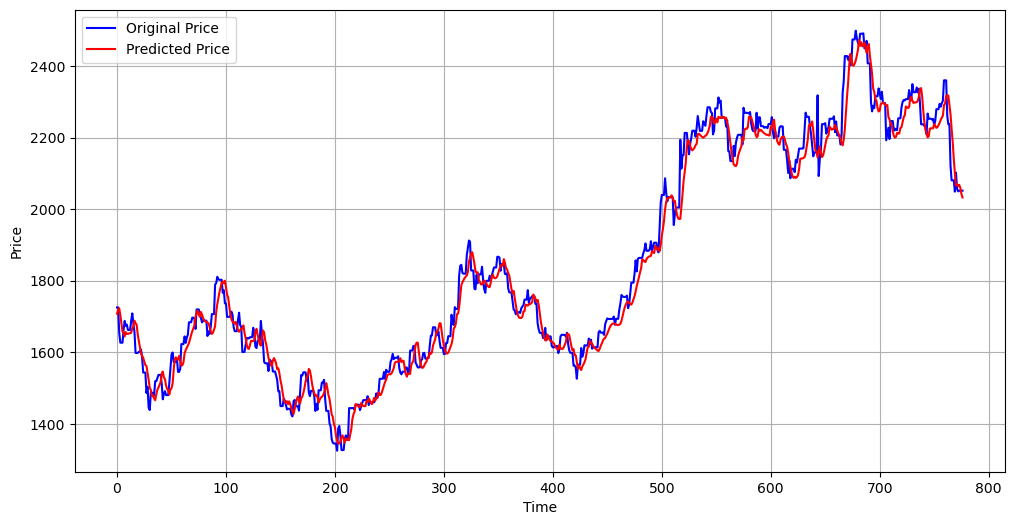

In [195]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_pred, 'r', label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [196]:
from sklearn.metrics import mean_absolute_error,r2_score
mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 1.81%


In [197]:
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

R2 score: 0.9809930323709488


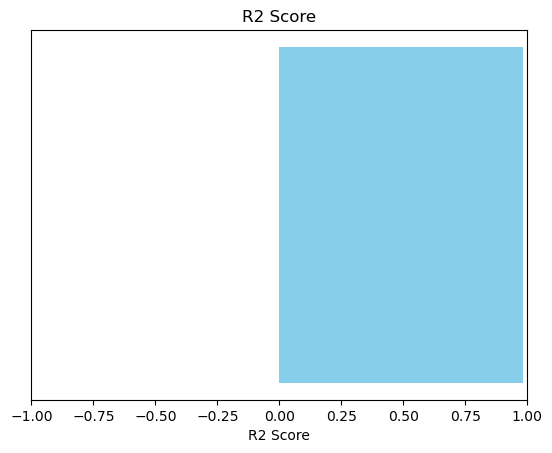

In [198]:
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')
plt.show()

# comapring with finbert lstm  and without news lstm model  

# LSTM Model with news Score
### Mean absolute error on test set: 1.81
### R2 score: 0.9809930323709488

# LSTM Model withOUT news Score
### Mean absolute error on test set: 8.15%
### R2 score: 0.9682327801518711

